## Testes iniciais com "Sikora_Complete.txt"
- Allan Vieira
- 2017 10 20

In [2]:
# carregando libs necessárias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, interpolate
%matplotlib inline


In [3]:
# lendo o dataset
sikora_df = pd.read_table('Sikora_Complete.txt', sep='\t')

In [4]:
sikora_df.dtypes

Core      float64
Lobe      float64
B_Band    float64
Mass      float64
R         float64
RF        float64
Type       object
dtype: object

In [5]:
sikora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
Core      197 non-null float64
Lobe      197 non-null float64
B_Band    197 non-null float64
Mass      197 non-null float64
R         197 non-null float64
RF        197 non-null float64
Type      197 non-null object
dtypes: float64(6), object(1)
memory usage: 10.9+ KB


In [6]:
sikora_df.head()


,Core,Lobe,B_Band,Mass,R,RF,Type
0,39.4,0.0,44.2,8.6,0.35,39.2,BLRG
1,39.0,0.0,42.2,7.5,1.94,39.0,BLRG
2,40.1,0.0,44.2,8.7,0.99,39.6,BLRG
3,43.4,0.0,44.0,8.9,4.58,43.4,BLRG
4,42.7,0.0,45.2,8.4,2.64,42.6,RLQ


In [7]:
sikora_df.tail()


,Core,Lobe,B_Band,Mass,R,RF,Type
192,42.2,43.3,45.5,9.7,1.85,0.0359,RLQ
193,41.2,43.3,41.9,8.6,4.41,0.0035,FRI
194,40.8,43.3,44.3,9.5,1.64,0.0014,BLRG
195,41.4,43.5,45.9,10.2,0.62,0.0035,RLQ
196,40.6,43.5,41.6,8.9,4.15,0.0005,FRI


In [17]:
# limpando o df:
# deixando também Type
# organizando a ordem das variáveis
sikora_df2 = sikora_df.iloc[:,[2,0,6]]
sikora_df2

,B_Band,Core,Type
0,44.2,39.4,BLRG
1,42.2,39.0,BLRG
2,44.2,40.1,BLRG
3,44.0,43.4,BLRG
4,45.2,42.7,RLQ
5,45.4,43.1,RLQ
6,45.2,42.7,RLQ
7,44.8,43.0,RLQ
8,42.9,38.4,SG-LINERS
9,44.9,39.7,SG-LINERS


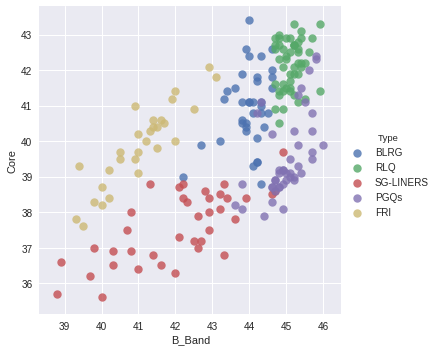

In [9]:
# scatter plot com os tipos de AGN's:

sns.lmplot('B_Band', # Horizontal axis
           'Core', # Vertical axis
           data=sikora_df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 70}) # S marker size
plt.show()

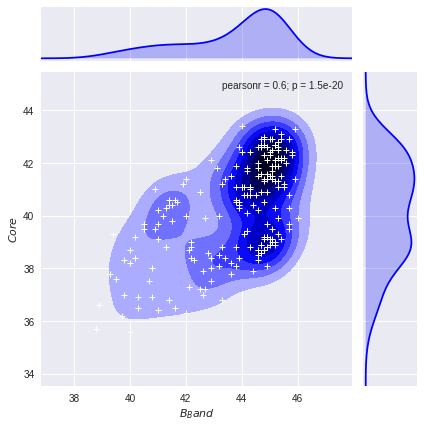

In [10]:
# verificando as denisdades marginais e bivariada:
g = sns.jointplot(x='B_Band', y='Core', data=sikora_df2, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$B_Band$", "$Core$")
plt.show()

In [42]:
### APLICANDO GMM (k=2, sem chute inicial)
# definindo e treinando o GMM
X1 = sikora_df2.iloc[:,:2]
est1 = GaussianMixture(covariance_type='full', n_components=2)
Y_fit1 = est1.fit(X1)
Y_fit1
Y_predict1 = pd.DataFrame(est.predict(X1), columns=['cluster_id'])
result1 = pd.concat([X1, Y_predict1], axis=1)  

result1


,B_Band,Core,cluster_id
0,44.2,39.4,1
1,42.2,39.0,0
2,44.2,40.1,1
3,44.0,43.4,1
4,45.2,42.7,1
5,45.4,43.1,1
6,45.2,42.7,1
7,44.8,43.0,1
8,42.9,38.4,0
9,44.9,39.7,1


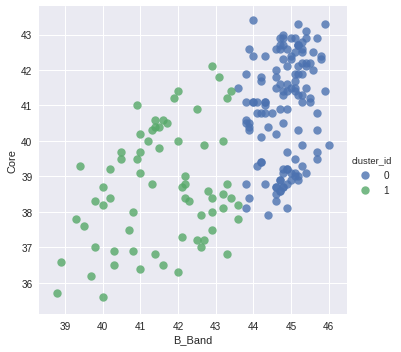

In [25]:
### Plotando o resultado
sns.lmplot('B_Band', # Horizontal axis
           'Core', # Vertical axis
           data=result1, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='cluster_id', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 70}) # S marker size
#plt.plot(est.cluster_centers_[0,0],est.cluster_centers_[0,1], "r*", ms=10)
#plt.plot(est.cluster_centers_[1,0],est.cluster_centers_[1,1], "r*", ms=10)

In [32]:
est.bic(X)

1452.4917265618003

In [27]:
## GMM com chutes iniciais para as médias (bivariadas)
# define and train GMM
X2 = sikora_df2.iloc[:,:2]
#est = GaussianMixture(covariance_type='full', n_components=2, means_init=[[43,41], [44,38]]) # jah ficou melhor
est2 = GaussianMixture(covariance_type='full', n_components=2, means_init=[[42,40.5], [43,37]]) # melhor ainda
#est = GaussianMixture(covariance_type='full', n_components=2, means_init=[[41,40.5], [43,37]]) # esse fica igual aos antigos
est2

Y_fit2 = est2.fit(X2)
Y_fit2

Y_predict2 = pd.DataFrame(est2.predict(X2), columns=['cluster_id'])
Y_predict2

result2 = pd.concat([X2, Y_predict2], axis=1)  

result2




,B_Band,Core,cluster_id
0,44.2,39.4,1
1,42.2,39.0,0
2,44.2,40.1,0
3,44.0,43.4,0
4,45.2,42.7,0
5,45.4,43.1,0
6,45.2,42.7,0
7,44.8,43.0,0
8,42.9,38.4,1
9,44.9,39.7,1


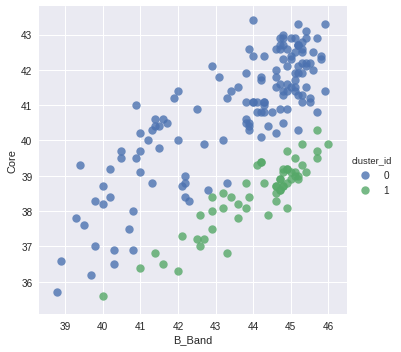

In [28]:
sns.lmplot('B_Band', # Horizontal axis
           'Core', # Vertical axis
           data=result2, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='cluster_id', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 70}) # S marker size
plt.show()

In [31]:
est2.bic(X2)

1496.4925442303568

In [60]:
## GMM com chutes iniciais (bivariados) para as médias (3 componentes)
# define and train GMM
X3 = sikora_df2.iloc[:,:2]
#est3 = GaussianMixture(covariance_type='full', n_components=3, means_init=[[42,40.5], [43,37], [44,42]]) # melhor ainda
est3 = GaussianMixture(covariance_type='full', n_components=3)
Y_fit3 = est3.fit(X3)

Y_predict3 = pd.DataFrame(est3.predict(X3), columns=['cluster_id'])

result3 = pd.concat([X3, Y_predict3], axis=1)  

result3


,B_Band,Core,cluster_id
0,44.2,39.4,1
1,42.2,39.0,2
2,44.2,40.1,0
3,44.0,43.4,0
4,45.2,42.7,0
5,45.4,43.1,0
6,45.2,42.7,0
7,44.8,43.0,0
8,42.9,38.4,1
9,44.9,39.7,1


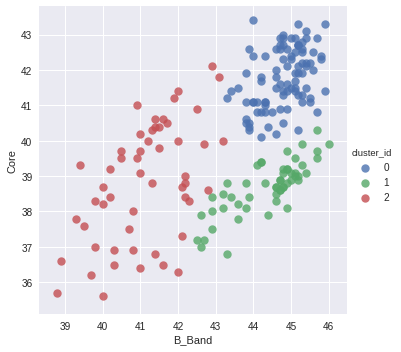

In [61]:
sns.lmplot('B_Band', # Horizontal axis
           'Core', # Vertical axis
           data=result3, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='cluster_id', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 70}) # S marker size
plt.show()

In [62]:
est3.bic(X3)

1424.4196230065452

In [57]:
## GMM com chutes iniciais (bivariados) para as médias (4 componentes)
# define and train GMM
X4 = sikora_df2.iloc[:,:2]
#est4 = GaussianMixture(covariance_type='full', n_components=4, means_init=[[42,40.5], [43,37], [44,42], [45,39]]) # melhor ainda
est4 = GaussianMixture(covariance_type='full', n_components=4)

Y_fit4 = est4.fit(X4)
Y_fit4

Y_predict4 = pd.DataFrame(est4.predict(X4), columns=['cluster_id'])
Y_predict4

result4 = pd.concat([X4, Y_predict4], axis=1)  

result4

,B_Band,Core,cluster_id
0,44.2,39.4,0
1,42.2,39.0,0
2,44.2,40.1,1
3,44.0,43.4,1
4,45.2,42.7,1
5,45.4,43.1,1
6,45.2,42.7,1
7,44.8,43.0,1
8,42.9,38.4,0
9,44.9,39.7,3


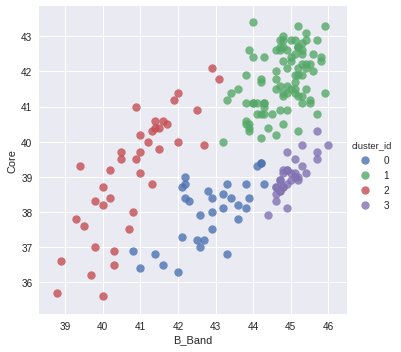

In [58]:
sns.lmplot('B_Band', # Horizontal axis
           'Core', # Vertical axis
           data=result4, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='cluster_id', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 70}) # S marker size

plt.show()

In [59]:
est4.bic(X4)

1424.3905154062245

In [63]:
BICs = np.array([est1.bic(X1), est2.bic(X2), est3.bic(X3), est4.bic(X4)])
#modelos = np.array(["k=2 - aleatório", "k=2 - chute inicial", "k=3 - chute inicial", "k=4 - chute inicial"])

BICs


array([ 1452.42968146,  1496.49254423,  1424.41962301,  1424.39051541])

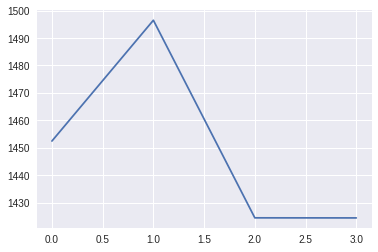

In [64]:
plt.plot(BICs)
plt.show()

In [ ]:
# os melhores modelos seriam com 3 e 4 grupos